# 1. Define the Problem


### Problem Statement
The growth of online distribution has grown by 46% from 2014 to 2018. The hold has shifted from manual bookings to online travel agencies by almost 68% in 2018. The hospitality industry is facing issues in revenue generation due to ease of cancellations of the bookings made. Based on the data collected in 2018, almost 40% of the revenue is cancelled before arrival. This comes with the possibility of easy online bookings and their cancellations. 

### Goal
Our aim with this project is to help the hospitality industry generate the maximum revenue with the resources available to them based on the factors identified. Specifically, in this project, our goal is to:
- Predict the future possibility of cancellation using Predictive Analytis approach - Factors like period of stay, weather, holiday season and time of the year for the booking may play a crucial role in determining whether the booking will be productive or not. This will determine whether the booking made will be productive based on historical data.
- Descriptive analytics to further understand patterns, trends, and anomalies in data.
- Evaluate the performance of various models and select best two models for hyperparameters tuning and then use this best model to make hotel bookings cancellation predition.




# 2. Discover the Problem
This project is divided in 5 sections:

    1.Data Exploration
    
        1.1 The Data, Data Description & Preprocessing

        1.2 Removing Duplicate observations
    
        1.3 Assessing Missing Values
    
        1.4 Investigating the datasets
        
        1.5 EDA (Exploratory Data Analysis)
        
        1.6 Re-encoding Some Features (Feature Engineering)


    2.0 Some Data Visualization
     
     
    3.0 Feature Engineering
        3.1 Numerical Columns
                A. Correlation Matrix and Heat-map
                B. Recursive Feature Elimination
                C. Feature Importance (ExtraTreesClassifier())
        3.2 Categorical Columns
                A. Chi Square Test & Fisher Score
     
      
    4.0 Model Selection: Logitic Regression, Gradient Boosting and Random Forest
        
        4.1 Feature Importances
        
    5.0 Conclusion

### <font color=blue>Import Libraries</font> 

In [1]:
" Common libraries " 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pymysql

### <font color=blue>Connect to the MySQL database</font> 

In [ ]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='root',
    database='ecommerce_target'
)
print("==== Connected to MySQL Server ====")
cursor = connection.cursor()

### <font color=blue>Functions used to Plot</font> 

In [2]:
# Functions used in this project
""" Visualize the Numerical Features """
def visualize_num_feature(hotel_data):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(hotel_data)
    plt.subplot(1,2,2)
    sns.distplot(hotel_data, bins=20)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(hotel_data):
    stat =  hotel_data.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))    

## 2.1 Data Exploration
### 2.1.1 Data, Data Description & Preprocessing

In [3]:
""" 
    - load the data into a Pandas dataframe
    - display first 5 rows from dataframe 
    - information for the datasets
    
"""
hotel_data = pd.read_csv("hotel_bookings.csv")
print("Number of records (rows) Hotel Bookings Demand Datasets: ", hotel_data.shape[0])
print("Number of features (columns) Hotel Bookings Demand Datasets: ", hotel_data.shape[1])
# print("\nColumns names of the hotel booking datasets: \n", hotel_data.columns.tolist())

print("\nFirst 5 records of the datasets: ")
display(hotel_data.head())

print("\n\n\nHotel Bookings Demand Datasets Information: ")
display(hotel_data.info())

Number of records (rows) Hotel Bookings Demand Datasets:  119390
Number of features (columns) Hotel Bookings Demand Datasets:  32

First 5 records of the datasets: 


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03





Hotel Bookings Demand Datasets Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                        

None

### 2.2 Removing Duplicate observations

In [4]:
"""
    - find and remove duplicate rows in hotel_data
"""

# check the number of duplicated rows
# no. of rows is identical to other row or rows
print("No. of duplicate rows: ", hotel_data.duplicated(keep='first').sum()) 

# Check for this duplicate rows as a dataframe
# display(hotel_data.loc[hotel_data.duplicated(keep='first')])

No. of duplicate rows:  31994


In [5]:
### Remove the duplicate rows #####
hotel_data = hotel_data.drop_duplicates(keep='first')
# check the dataset dimension
print("\nDimesnion of hotel_data after removing duplicates: ", hotel_data.shape)


Dimesnion of hotel_data after removing duplicates:  (87396, 32)


### 2.3 Assessing Missing Values

In [6]:
""" Checking for Null, NA, NaN values """
missing_data = hotel_data.isnull().sum(axis=0)
print("No. of missing data in each columns: \n", missing_data)

columns_with_missing_value = hotel_data.columns[hotel_data.isnull().any()].tolist()
print("\n Columns name which has missing value: ", columns_with_missing_value)


columns_with_nan = hotel_data.columns[hotel_data.isna().any()].tolist()
print("\n Columns name which has NaN: ", columns_with_nan)

## verifying
print("\n Missing Values are equals to NaN: ", columns_with_missing_value == columns_with_nan)

No. of missing data in each columns: 
 hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
c

### 2.4 Investigating the Data

#### A. Analysis of Target Variable 'is_cancelled'

Text(0, 0.5, 'Total Count')

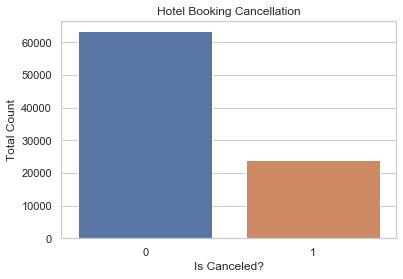

In [7]:
## is_cancelled
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="is_canceled", data=hotel_data)
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

##### A.1 Worse Case Baseline Accuracy

In [8]:
booking_cancel = (hotel_data['is_canceled'] == 1).sum()
print("No. of booking canceled: ", booking_cancel)
not_booking_cancel = (hotel_data['is_canceled'] == 0).sum()
print("No. of booking not canceled: ", not_booking_cancel)
total_booking = booking_cancel + not_booking_cancel
print("Total count: ", total_booking)
print("% Worse Case Base line Accuracy based on majority class: ", (not_booking_cancel/total_booking) * 100, "%" )

No. of booking canceled:  24025
No. of booking not canceled:  63371
Total count:  87396
% Worse Case Base line Accuracy based on majority class:  72.5101835324271 %


##### A.2


#### B. Analysis of columns with missing value:  ['children', 'country', 'agent', 'company']

In [9]:
missing_col = hotel_data[['children', 'country', 'agent', 'company']]

<font color=red>B1. Company</font>

In [10]:
"""
    - Analysis of 'company" Feature
"""
# display(missing_col['company'].value_counts())
print("Missing values in 'company' column: ", missing_col['company'].isnull().sum())
print("Not missing values in 'company' column: ",missing_col['company'].notnull().sum())

Missing values in 'company' column:  82137
Not missing values in 'company' column:  5259


- Note: For online booking "compnany" will not play important role
- Wow: Missing values are higher --- its okay to remove this column

<font color=red>B2. Agent</font>

In [11]:
"""
    - Analysis of "agent" Feature
"""
# display(missing_col['agent'].value_counts())
print("Missing values in 'agent' column: ", missing_col['agent'].isnull().sum())
print("Not missing values in 'agent' column: ",missing_col['agent'].notnull().sum())

## Wow: Missing values are higher --- its okay to remove this column

Missing values in 'agent' column:  12193
Not missing values in 'agent' column:  75203


- Note: For online booking "agent" is not important
- Wow: Missing values are higher --- its okay to remove this column

<font color=red>B3. Children</font>

Missing values in 'children' column:  4
Not missing values in 'children' column:  87392
value 	 count of children 
 0.0     79028
1.0      4695
2.0      3593
3.0        75
NaN         4
10.0        1
Name: children, dtype: int64


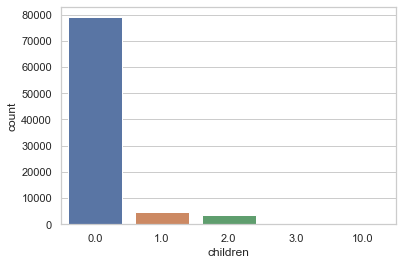

In [12]:
"""
    - Analysis of "children" Feature
"""
print("Missing values in 'children' column: ", missing_col['children'].isnull().sum())
print("Not missing values in 'children' column: ",missing_col['children'].notnull().sum())

### children
print("value \t count of children \n", missing_col['children'].value_counts(dropna=False))
sns.countplot(x="children", data=missing_col)

In [13]:
# Replace NaN with 1 child
hotel_data['children'] = hotel_data['children'].replace(np.nan, 1)

In [14]:
# Replace 10 children with 1 child
hotel_data['children'] = hotel_data['children'].replace(to_replace = 10, value = 1) 

In [15]:
print("value count of children :", hotel_data['children'].value_counts(dropna=False))
# display(new_hotel_data[new_hotel_data.children.isnull()])

value count of children : 0.0    79028
1.0     4700
2.0     3593
3.0       75
Name: children, dtype: int64


 <font color=red>B4. Country</font>

In [16]:
print("Missing values in 'country' column: ", missing_col['country'].isnull().sum())
print("Not missing values in 'country' column: ",missing_col['country'].notnull().sum())

Missing values in 'country' column:  452
Not missing values in 'country' column:  86944


#### C. Removing <font color=red>['country', 'agent', 'company']</font> feature

In [17]:
hotel_data = hotel_data.drop(['country', 'agent', 'company'], axis=1)

## Check
print(hotel_data.isna().any())

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
days_in_waiting_list              False
customer_type                     False
adr                               False


### 2.5 Exploratory Data Analysis
#### 2.5.1 Descriptive Statistics: 
- Measure of Central Tendency:
- Measure of Dispersion:

**Summarizing numerical and categorical columns seperately**


In [18]:
# print(" Columns names and their types: \n", hotel_data.dtypes)
# num_int_type = hotel_data.select_dtypes(include = [np.number]).columns.tolist()
num_int_type = hotel_data.select_dtypes(include='int64').columns.tolist()
# print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = hotel_data.select_dtypes(include='float64').columns.tolist()
# print("\nNumeric-Float Types columns name: \n", num_float_type)

cat_object_type = hotel_data.select_dtypes(include='object').columns.tolist()
# print("\n\nCategorical Types columns name: \n", cat_object_type)


## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
num_type = num_int_type + num_float_type
display(hotel_data[num_type].describe().T)
# display(hotel_data.describe(include = [np.number]).T)

## Summary of categorical features
# print("\nSummary of Statistics for categorical columns: ")
# display(hotel_data[cat_object_type].describe().T)
# display(hotel_data.describe(include = ['O']).T)

# print(hotel_data[cat_object_type].hotel.value_counts())


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0
is_repeated_guest,87396.0,0.039075,0.193775,0.00,0.0,0.0,0.0,1.0


**Note** Conclusion of statistics summary
1. 'arrival_data_year' need to be encoded from 2015, 2016, and 2017 are big number and will impack the model performance
2. 'stays_in_weekend_nights'  need to be encoded since 1st qaurtile is 0, 2nd quartile is 1, 3rd quartile is 2 while max value is 19
3. 'stays_in_week_nights' need to be encoded since 1st qaurtile is 0, 2nd quartile is 2, 3rd quartile is 3 while max value is 50 with further analysis
4. 'babies' features has issue Max is 50 while other quartiles are 0
5. 

#### 2.5.2 Univariate Analysis

- 2.5.2.1 Lead Time

Visulaize lead_time Feature


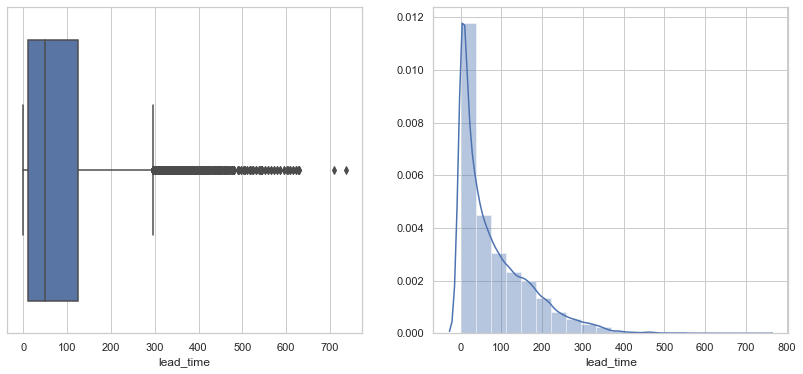

count    87396.000000
mean        79.891368
std         86.052325
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64
The upper and lower bounds for suspected outliers are 296.0 and -160.0


In [19]:
### lead_time
print('Visulaize lead_time Feature')
visualize_num_feature(hotel_data.lead_time)
stat_summary(hotel_data.lead_time) 

In [20]:
## "lead_time"
# The upper and lower bounds for suspected outliers are 296.0 and -160.0
# lower outlier -160.0 does not make sense - I will explain why we are getting this
# I am just choosing
remain_lead_time = hotel_data.lead_time < 300
print(remain_lead_time.shape)
new_hotel_data = hotel_data[remain_lead_time]
print(hotel_data.shape)

(87396,)
(87396, 29)


Visulaize lead_time Feature


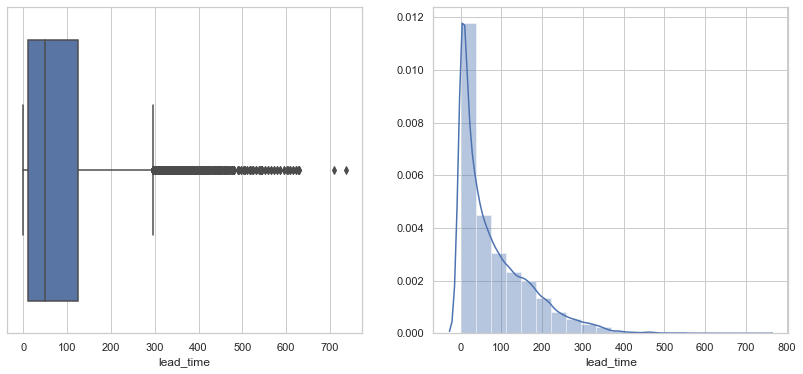

count    85078.000000
mean        72.435953
std         73.638806
min          0.000000
25%         11.000000
50%         46.000000
75%        117.000000
max        299.000000
Name: lead_time, dtype: float64
The upper and lower bounds for suspected outliers are 276.0 and -148.0


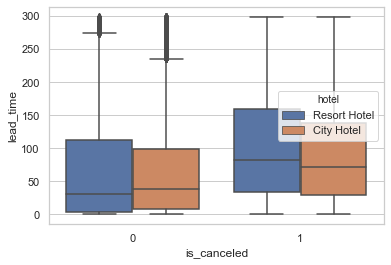

In [21]:
print('Visulaize lead_time Feature')
visualize_num_feature(hotel_data.lead_time)
stat_summary(new_hotel_data.lead_time) 

sns.boxplot(x = 'is_canceled', y = 'lead_time', data = new_hotel_data, hue='hotel')

- 2.5.2.2 'stays_in_weekend_nights' and 'stays_in_weeknights'

Both features need to be encoded

Visulaize 'stays_in_weekend_nights' Feature


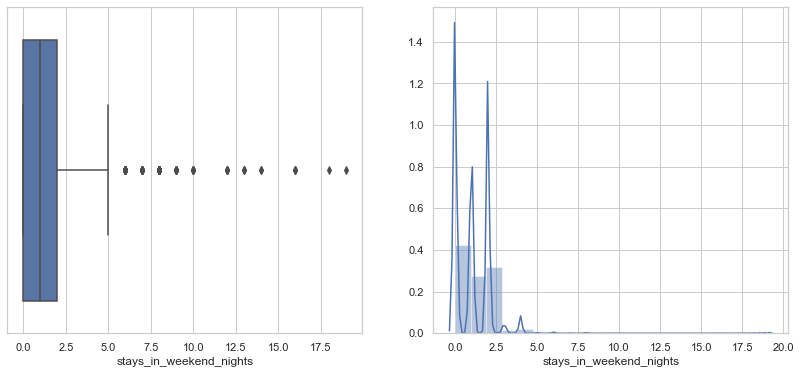

count    87396.000000
mean         1.005263
std          1.031921
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64
The upper and lower bounds for suspected outliers are 5.0 and -3.0
Visulaize 'stays_in_week_nights' Feature


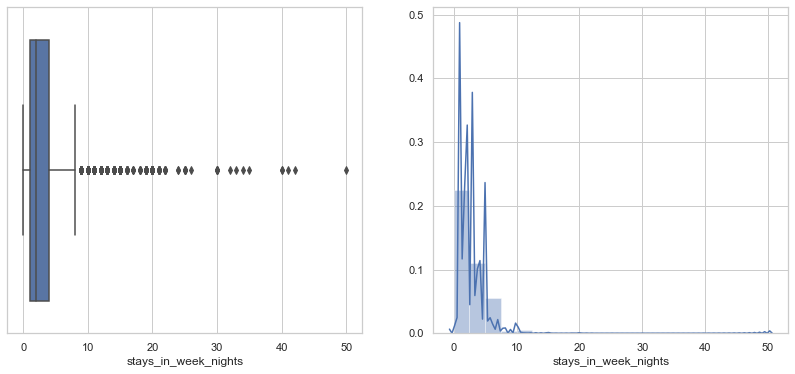

count    87396.000000
mean         2.625395
std          2.053584
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64
The upper and lower bounds for suspected outliers are 8.5 and -3.5


In [22]:
print("Visulaize 'stays_in_weekend_nights' Feature")
visualize_num_feature(hotel_data['stays_in_weekend_nights'])
stat_summary(hotel_data['stays_in_weekend_nights']) 


############################################################################

print("Visulaize 'stays_in_week_nights' Feature")
visualize_num_feature(hotel_data['stays_in_week_nights'])
stat_summary(hotel_data['stays_in_week_nights']) 

2.5.2.3 Adults

'adults' feature need to be encoded

Visulaize 'Adults' Feature
count    87396.000000
mean         1.875795
std          0.626500
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64
The upper and lower bounds for suspected outliers are 2.0 and 2.0


2     64497
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

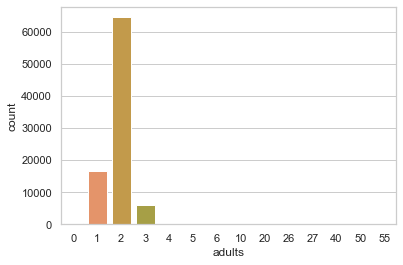

In [23]:
print("Visulaize 'Adults' Feature")
# bar plot
sns.countplot(x="adults", data=hotel_data)
stat_summary(hotel_data['adults']) 
display(hotel_data['adults'].value_counts(dropna=False))

2.5.2.4 Babies

'babies' feature need to be encoded

Visulaize 'Babies' Feature
count    87396.000000
mean         0.010824
std          0.113597
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: babies, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


0     86482
1       897
2        15
10        1
9         1
Name: babies, dtype: int64

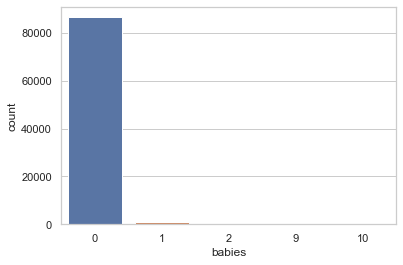

In [24]:
print("Visulaize 'Babies' Feature")
# bar plot
sns.countplot(x="babies", data=hotel_data)
stat_summary(hotel_data['babies']) 
display(hotel_data['babies'].value_counts(dropna=False))

2.5.2.5
- 'is_repeated_guest
- 'previous_cancellations', 
- 'previous_bookings_not_canceled', 
- 'booking_changes'

In [25]:
hotel_data['is_repeated_guest'].value_counts(dropna=False)

0    83981
1     3415
Name: is_repeated_guest, dtype: int64

In [26]:
hotel_data['previous_cancellations'].value_counts(dropna=False)

0     85711
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
21        1
19        1
14        1
Name: previous_cancellations, dtype: int64

2.5.2.6 'days_in_waiting_list' and 'adr'

Visulaize adr Feature


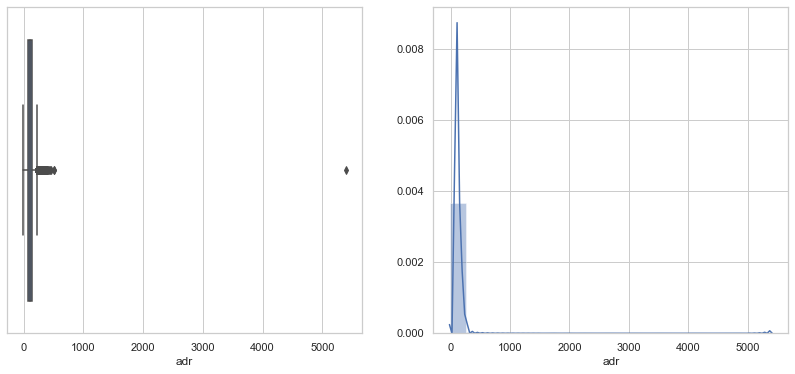

count    85078.000000
mean       106.664777
std         55.233281
min         -6.380000
25%         72.250000
50%         98.870000
75%        134.915000
max       5400.000000
Name: adr, dtype: float64
The upper and lower bounds for suspected outliers are 228.91250000000005 and -21.74750000000003


'\nAverage Daily Rate as defined by dividing the sum of all \nlodging transactions by the total number of staying nights\n\n'

In [27]:
### adr
print('Visulaize adr Feature')
visualize_num_feature(new_hotel_data['adr'])
stat_summary(new_hotel_data['adr']) 

"""
Average Daily Rate as defined by dividing the sum of all 
lodging transactions by the total number of staying nights

"""
## may need to do imputation

In [28]:
## "adr"
remain_adr = new_hotel_data['adr'] < 300
print(remain_adr.shape)
new_hotel_data = new_hotel_data[remain_adr]
print(new_hotel_data.shape)

(85078,)
(84809, 29)


Visulaize lead_time Feature


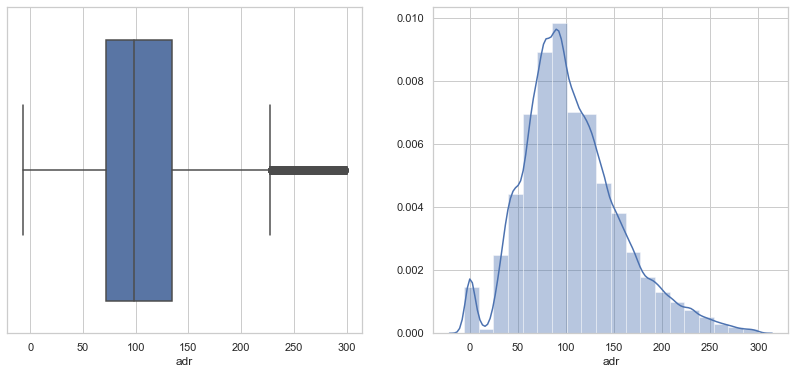

count    84809.000000
mean       105.898775
std         50.693433
min         -6.380000
25%         72.250000
50%         98.400000
75%        134.100000
max        299.430000
Name: adr, dtype: float64
The upper and lower bounds for suspected outliers are 226.875 and -20.52499999999999


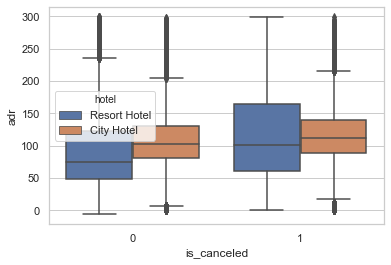

In [29]:
print('Visulaize lead_time Feature')
visualize_num_feature(new_hotel_data['adr'])
stat_summary(new_hotel_data['adr']) 

sns.boxplot(x = 'is_canceled', y = 'adr', data = new_hotel_data, hue='hotel')

In [30]:
hotel_data['reservation_status'].value_counts(dropna=False)



Check-Out    63371
Canceled     23011
No-Show       1014
Name: reservation_status, dtype: int64

#### 2.5.3 Bivariate Analysis 

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
is_canceled,,,,,,,,,,,,
0,5499,7634,3753,4683,3655,6859,5411,5683,5913,3941,5292,5048
1,2409,3623,1378,1415,1038,3198,2354,1830,2442,1054,1642,1642


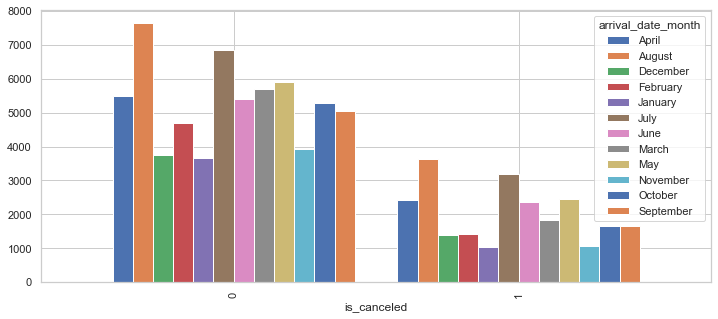

In [31]:
## arrival_date_month vs is_canceled

table_date_month = pd.crosstab(index=hotel_data["is_canceled"], 
                                  columns=hotel_data["arrival_date_month"])

display(table_date_month )

table_date_month .plot(kind="bar", 
                 figsize=(12,5),
                 stacked=False,
                 width=0.85)

adults,0,1,2,3,4,5,6,10,20,26,27,40,50,55
is_canceled,,,,,,,,,,,,,,
0,288,13294,45836,3907,46,0,0,0,0,0,0,0,0,0
1,97,3209,18661,2028,14,2,1,1,2,5,2,1,1,1


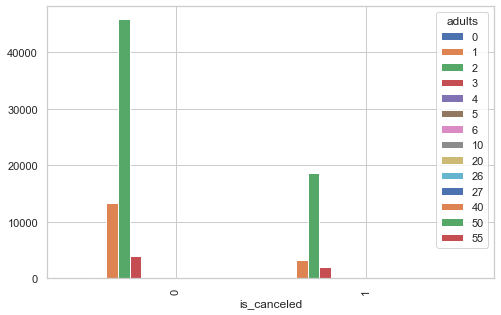

In [32]:
## adults vs is_canceled
table_adults = pd.crosstab(index=hotel_data["is_canceled"], 
                                  columns=hotel_data["adults"])

display(table_adults)

table_adults.plot(kind="bar", 
                 figsize=(8,5),
                 stacked=False,
                 width=0.85)

In [33]:
# count of members checked out from the two hotels
table_hotel = pd.crosstab(hotel_data['hotel'], hotel_data['is_canceled'], 
            margins=True, margins_name="Total")
display(table_hotel)

is_canceled,0,1,Total
hotel,,,
City Hotel,37379,16049,53428
Resort Hotel,25992,7976,33968
Total,63371,24025,87396


adults,0,1,2,3,4,5,6,10,20,26,27,40,50,55
is_canceled,,,,,,,,,,,,,,
0,288,13294,45836,3907,46,0,0,0,0,0,0,0,0,0
1,97,3209,18661,2028,14,2,1,1,2,5,2,1,1,1


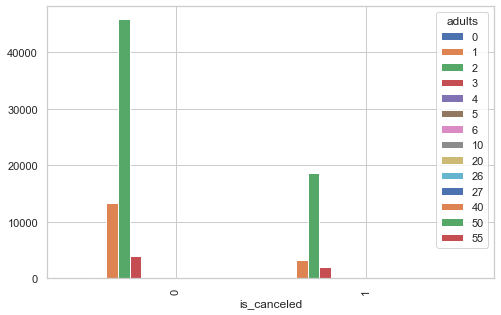

In [34]:
table_adults = pd.crosstab(index=hotel_data["is_canceled"], 
                                  columns=hotel_data["adults"])

display(table_adults)

table_adults.plot(kind="bar", 
                 figsize=(8,5),
                 stacked=False,
                 width=0.85)

reservation_status,Canceled,Check-Out,No-Show
is_canceled,,,
0,0,63371,0
1,23011,0,1014


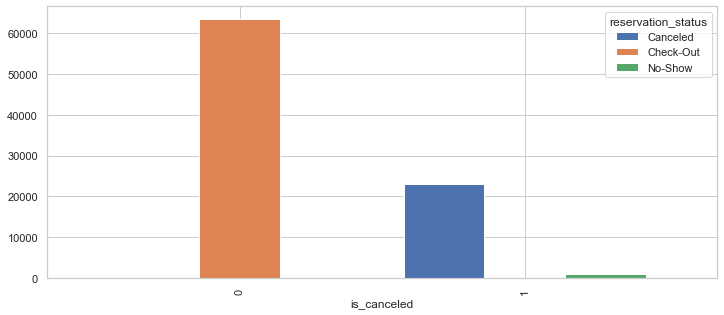

In [35]:
## reservation_status vs is_canceled

table_reservation_status = pd.crosstab(index=hotel_data["is_canceled"], 
                                  columns=hotel_data["reservation_status"])

display(table_reservation_status )

table_reservation_status.plot(kind="bar", 
                 figsize=(12,5),
                 stacked=False,
                 width=0.85)

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,2627,490,50314,9940
1,512,54,21672,1787


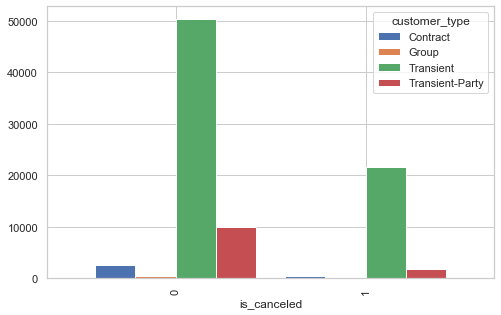

In [36]:
## Customer Type Feature
# Customer Type
table_customer_type = pd.crosstab(index=hotel_data["is_canceled"], 
                                  columns=hotel_data["customer_type"])

display(table_customer_type)

table_customer_type.plot(kind="bar", 
                 figsize=(8,5),
                 stacked=False,
                        width=0.85)

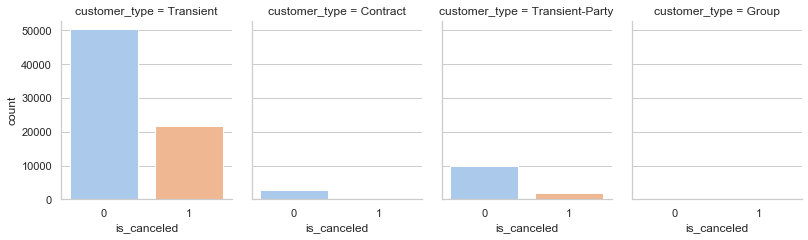

In [37]:
g = sns.catplot("is_canceled", col="customer_type", col_wrap=4,
                data=hotel_data[hotel_data['customer_type'].notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='pastel')


g

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,182,614,3702,10067,3607,11826,33373,0
1,45,88,510,1737,1335,2063,18245,2


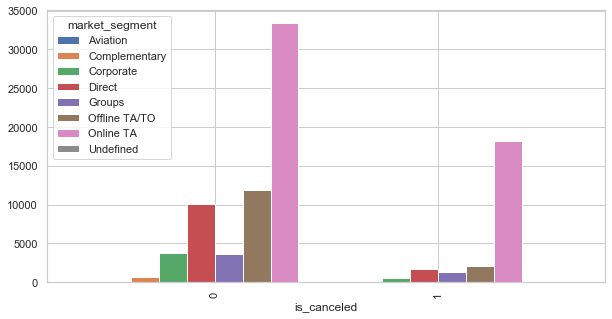

In [38]:
# Market segment
table_market_segment = pd.crosstab(index=hotel_data["is_canceled"], 
                                  columns=hotel_data["market_segment"])

display(table_market_segment)

table_market_segment.plot(kind="bar", 
                 figsize=(10,5),
                 stacked=False,
                         width=1)

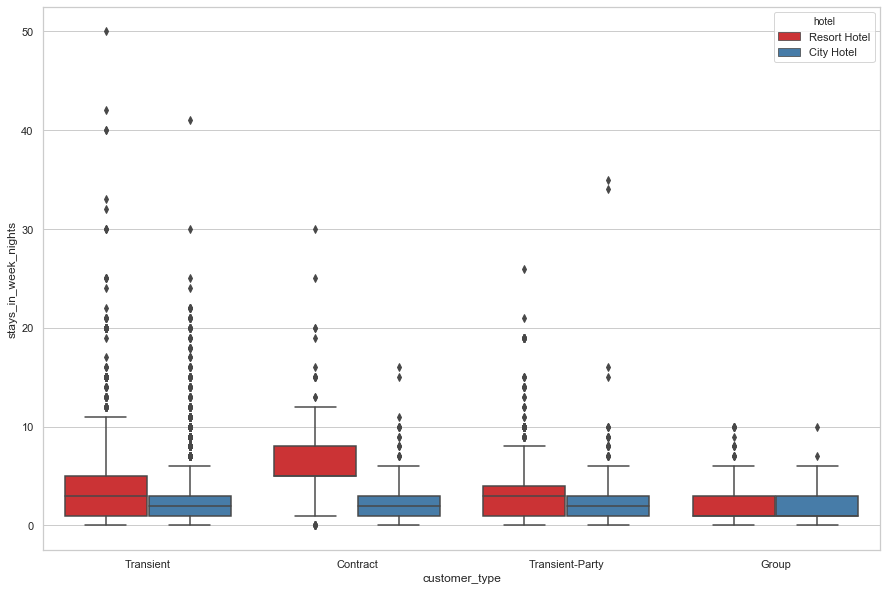

In [39]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = "customer_type", y = "stays_in_week_nights", data = hotel_data, hue = "hotel", palette = 'Set1');

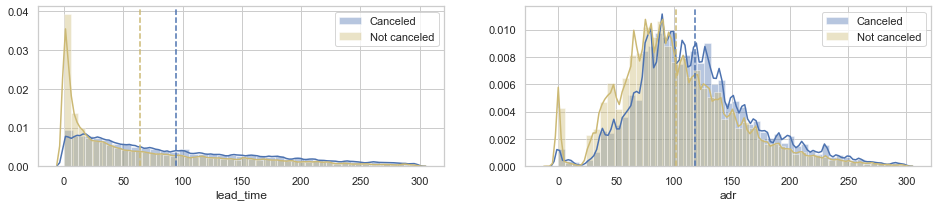

In [40]:
# Subsetting by is_canceled!
canceled = hotel_data["is_canceled"] == 1
not_canceled = hotel_data["is_canceled"] == 0

# Creating the plots
# features = ['lead_time', 'adr', 
#             'previous_cancellations', 'previous_bookings_not_canceled',
#            'is_repeated_guest']
features = ['lead_time', 'adr']
labels = ['Canceled', 'Not canceled']

def creating_plots(features, labels):
    plt.figure(figsize=(16,10))
    for feature in features:
        plt.subplot(3, 2, features.index(feature)+1)
        sns.distplot(new_hotel_data[feature][canceled], label=labels[0], color="b", kde_kws={'bw':2})
        sns.distplot(new_hotel_data[feature][not_canceled], label=labels[1], color="y", kde_kws={'bw':2})
        plt.axvline(new_hotel_data[feature][canceled].mean(), linestyle = '--', color="b")
        plt.axvline(new_hotel_data[feature][not_canceled].mean(), linestyle = '--', color="y")
        plt.legend()

creating_plots(features, labels)

In [41]:
data = hotel_data.copy()

### 2.6 Re-encoding Some Features
#### <font color=green>Feature Engineering</font>

In [42]:
data['arrival_date_year'].value_counts(dropna=False)

2016    42391
2017    31692
2015    13313
Name: arrival_date_year, dtype: int64

In [43]:
# Encode 'arrival_date_year' feature
# "2015", "2016", "2017" are the big number and will effect model learning
data = data.replace({'arrival_date_year': {2015: '2015', 2016: '2016', 2017: '2017'}})
# data.info()

stays_in_weekend_nights

In [44]:
data['stays_in_weekend_nights'].value_counts(dropna=False)

0     35151
2     26414
1     22657
4      1734
3      1150
6       113
5        70
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [45]:
# Encode 'stays_in_weekend_nights' feature
data['stays_in_weekend_nights'] = ['0 weekend night' if x == 0
                 else '1 weekend night' if x == 1
                 else '2 weekend night' if x == 2
                 else '3 weekend night' if x == 3
                 else '4 weekend night' if x == 4
                 else '5 weekend night' if x == 5                 
                 else 'N/A'
                 for x in data['stays_in_weekend_nights']]

In [46]:
# Encode 'stays_in_week_nights' feature
data['stays_in_week_nights'] = ['0 week night' if x == 0
                 else '1 week night' if x == 1
                 else '2 week night' if x == 2
                 else '3 week night' if x == 3
                 else '4 week night' if x == 4
                 else '5 week night' if x == 5
                 else '6 week night' if x == 6
                 else '7 week night' if x == 7
                 else '8 week night' if x == 8
                 else '9 week night' if x == 9
                 else '10 week night' if x == 10
                 else 'N/A'
                 for x in data['stays_in_week_nights']]

In [47]:
# Encode 'adults' feature
data['adults'] = ['0 adult' if x == 0
                 else '1 adult' if x == 1
                 else '2 adults' if x == 2
                 else '3 adults' if x == 3
                 else '4 adults' if x == 4
                 else '5 adults' if x == 5
                 else 'N/A'
                 for x in data['adults']]

In [48]:
# Encode 'babies' feature
data['babies'] = ['0 babies' if x == 0
                 else '1 baby' if x == 1
                 else '2 babies' if x == 2
                 else 'N/A'
                 for x in data['babies']]

In [49]:
## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
display(data.describe(include = [np.number]).T)

## Summary of categorical features
print("\nSummary of Statistics for categorical columns: ")
display(data.describe(include = ['O']).T)


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
children,87396.0,0.138576,0.454695,0.00,0.0,0.0,0.0,3.0
is_repeated_guest,87396.0,0.039075,0.193775,0.00,0.0,0.0,0.0,1.0
previous_cancellations,87396.0,0.030413,0.369145,0.00,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,87396.0,0.183990,1.731894,0.00,0.0,0.0,0.0,72.0
booking_changes,87396.0,0.271603,0.727245,0.00,0.0,0.0,0.0,21.0
days_in_waiting_list,87396.0,0.749565,10.015731,0.00,0.0,0.0,0.0,391.0



Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_year,87396,3,2016,42391
arrival_date_month,87396,12,August,11257
stays_in_weekend_nights,87396,7,0 weekend night,35151
stays_in_week_nights,87396,12,1 week night,22191
adults,87396,7,2 adults,64497
babies,87396,4,0 babies,86482
meal,87396,5,BB,67978
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141


In [50]:
data = data.drop('reservation_status_date', axis=1)
data.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status']

## 3. Feature Selection 
### 3.1 Numerical Columns
- A. Correlation Matrix and Heat-Map
- B. Recursive Feature Elimination
- C. Feature Importance (ExtraTreesClassifier())

### A. Correlation Matrix and Heat-Map

 Heat map for categorical columns: 


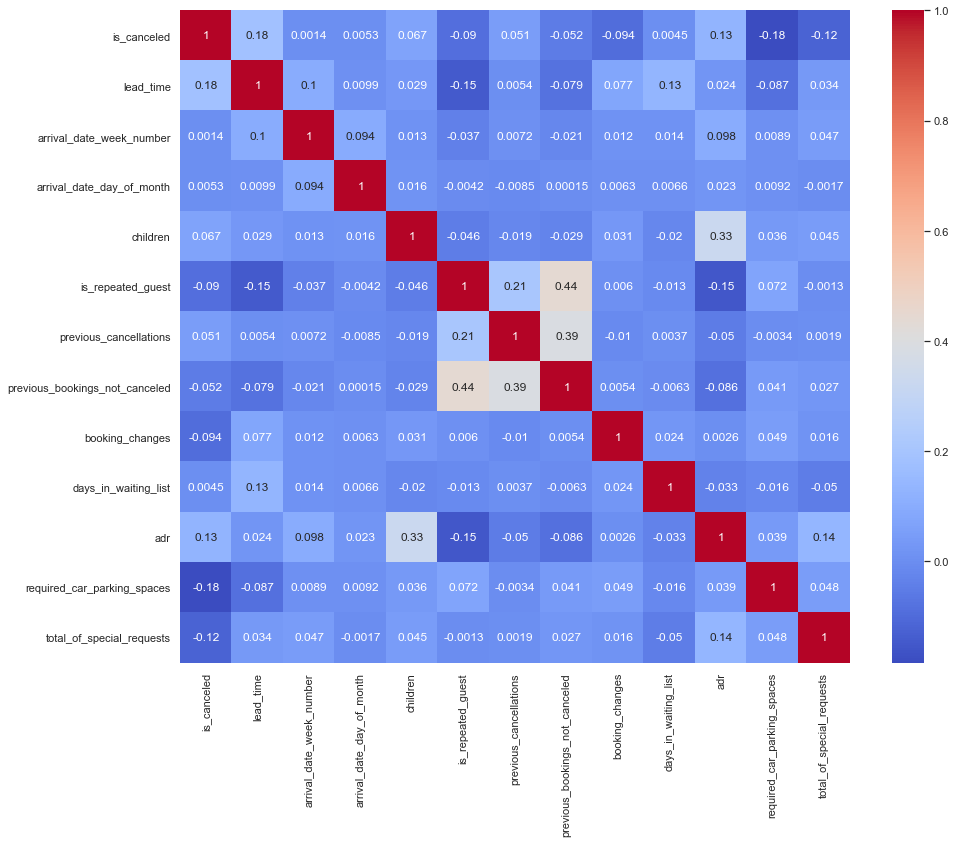

In [51]:
### Correlation

corr_matrix = data.corr()
# display(corr_matrix)

print(" Heat map for categorical columns: ")
plt.subplots(figsize=(15,12))
display(sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm'))

#### Sort out the Important Numerical Features

In [52]:
num_fea_corr = data.corr()["is_canceled"]
num_fea_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.184806
required_car_parking_spaces       0.184206
adr                               0.127986
total_of_special_requests         0.120545
booking_changes                   0.093644
is_repeated_guest                 0.089643
children                          0.067339
previous_bookings_not_canceled    0.052154
previous_cancellations            0.051468
arrival_date_day_of_month         0.005328
days_in_waiting_list              0.004464
arrival_date_week_number          0.001443
Name: is_canceled, dtype: float64

### B. Recursive Feature Elimination

In [53]:
num_type = data.select_dtypes(include = [np.number]).columns.tolist()
X_numeric = data[num_type]

X_numeric = X_numeric.drop('is_canceled', axis=1)
display(X_numeric.head())
y = data['is_canceled']

## Scale the numeric variable using satnde
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numeric_scale = pd.DataFrame(scaler.fit_transform(X_numeric), columns = X_numeric.columns)
display(X_numeric_scale.head())

# print(X_numeric.shape)
# print(X_numeric.info())

,lead_time,arrival_date_week_number,arrival_date_day_of_month,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0.0,0,0,0,3,0,0.0,0,0
1,737,27,1,0.0,0,0,0,4,0,0.0,0,0
2,7,27,1,0.0,0,0,0,0,0,75.0,0,0
3,13,27,1,0.0,0,0,0,0,0,75.0,0,0
4,14,27,1,0.0,0,0,0,0,0,98.0,0,1


,lead_time,arrival_date_week_number,arrival_date_day_of_month,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,3.045939,0.011822,-1.676896,-0.304769,-0.201653,-0.082389,-0.106237,3.751709,-0.074839,-1.932925,-0.29917,-0.839684
1,7.636196,0.011822,-1.676896,-0.304769,-0.201653,-0.082389,-0.106237,5.126769,-0.074839,-1.932925,-0.29917,-0.839684
2,-0.847064,0.011822,-1.676896,-0.304769,-0.201653,-0.082389,-0.106237,-0.373470,-0.074839,-0.569627,-0.29917,-0.839684
3,-0.777338,0.011822,-1.676896,-0.304769,-0.201653,-0.082389,-0.106237,-0.373470,-0.074839,-0.569627,-0.29917,-0.839684
4,-0.765717,0.011822,-1.676896,-0.304769,-0.201653,-0.082389,-0.106237,-0.373470,-0.074839,-0.151549,-0.29917,0.362324


In [54]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression(solver='lbfgs', random_state=42, n_jobs=-1)

# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_numeric_scale, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True  True False False False  True False]
[ 3  7 10  8  6  1  1  5  9  2  1  4]


### C. Feature Importance (ExtraTreesClassifier())

[0.28008649 0.13295423 0.16024498 0.01076333 0.00709686 0.02681556
 0.00457745 0.03558693 0.00435581 0.26255104 0.03309933 0.04186799]


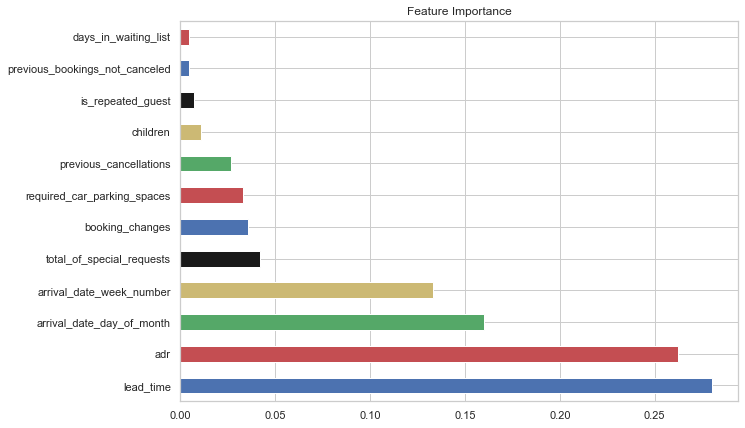

In [55]:
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_numeric_scale, y)
# display the relative importance of each attribute
print(model.feature_importances_)

# feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_numeric_scale.columns)

from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(feat_importances)))
plt.figure(figsize = (10, 7))
feat_importances.nlargest(15).plot(kind='barh', color=my_colors, title = 'Feature Importance')

# feat_importances.nlargest(15).sns.countplot()
plt.show()

In [56]:
num_type

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'children',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

## Based on Feature Importance
### Removing  


In [57]:
data = data.drop(['days_in_waiting_list','previous_bookings_not_canceled', 'is_repeated_guest', 'children' ], axis=1)
data.shape

(87396, 24)

## 3.2 Categorical Features
- A. Chi Square Test & Fisher Score


### A. Chi Square Test

In [58]:
cat_object_type = data.select_dtypes(include='object').columns.tolist()
print("Categorical Types columns name: \n", cat_object_type)

X_cat = data[cat_object_type]
display(X_cat.head())

y = data['is_canceled']

Categorical Types columns name: 
 ['hotel', 'arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


,hotel,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,2015,July,0 weekend night,0 week night,2 adults,0 babies,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,2015,July,0 weekend night,0 week night,2 adults,0 babies,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,2015,July,0 weekend night,1 week night,1 adult,0 babies,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,2015,July,0 weekend night,1 week night,1 adult,0 babies,BB,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,2015,July,0 weekend night,2 week night,2 adults,0 babies,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [59]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
X_cat = X_cat.apply(lambda col: le.fit_transform(col))
X_cat.head(10)

,hotel,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,1,0,5,0,0,2,0,0,3,1,2,2,0,2,1
1,1,0,5,0,0,2,0,0,3,1,2,2,0,2,1
2,1,0,5,0,1,1,0,0,3,1,0,2,0,2,1
3,1,0,5,0,1,1,0,0,2,0,0,0,0,2,1
4,1,0,5,0,3,2,0,0,6,3,0,0,0,2,1
6,1,0,5,0,3,2,0,0,3,1,2,2,0,2,1
7,1,0,5,0,3,2,0,1,3,1,2,2,0,2,1
8,1,0,5,0,4,2,0,0,6,3,0,0,0,2,0
9,1,0,5,0,4,2,0,2,5,3,3,3,0,2,0
10,1,0,5,0,5,2,0,0,6,3,4,4,0,2,0


In [60]:
X = X_cat.copy()
print(X.shape)
y = data['is_canceled']
print(y.shape)

(87396, 15)
(87396,)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
from sklearn.feature_selection import chi2

f_score = chi2(X_train, y_train)
f_score

(array([2.14309590e+02, 2.05983488e+02, 3.35890747e+02, 2.33202673e+02,
        8.85604788e+02, 7.51479852e+01, 3.49076397e+01, 3.30898934e+02,
        8.34150880e+02, 5.67264025e+02, 3.91106292e+02, 6.78183336e+02,
        1.60354974e+03, 8.87827653e+00, 1.56066717e+04]),
 array([1.57644851e-048, 1.03322372e-046, 5.00966435e-075, 1.19375064e-052,
        1.32188844e-194, 4.36722199e-018, 3.45721680e-009, 6.12349205e-074,
        2.02878777e-183, 2.21038134e-125, 4.75375737e-087, 1.65954213e-149,
        0.00000000e+000, 2.88583844e-003, 0.00000000e+000]))

In [63]:
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace=True)
p_values

## Comment: Lowest the p-values---- more important it is

deposit_type                0.000000e+00
reservation_status          0.000000e+00
stays_in_week_nights       1.321888e-194
market_segment             2.028788e-183
assigned_room_type         1.659542e-149
distribution_channel       2.210381e-125
reserved_room_type          4.753757e-87
arrival_date_month          5.009664e-75
meal                        6.123492e-74
stays_in_weekend_nights     1.193751e-52
hotel                       1.576449e-48
arrival_date_year           1.033224e-46
adults                      4.367222e-18
babies                      3.457217e-09
customer_type               2.885838e-03
dtype: float64

In [64]:
type(p_values)

pandas.core.series.Series

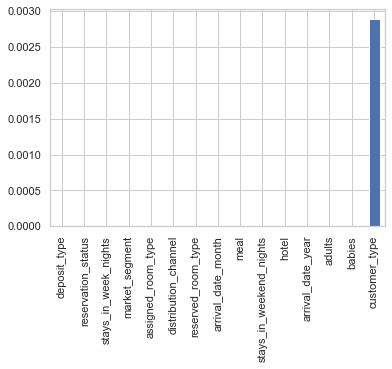

In [65]:
# plot
p_values.plot.bar()

##### From above Fisher Score and Chi2 test
#### Removing 
<font color=red>
'customer_type', 'babies', 'arrival_date_year'
</font>


In [66]:
data = data.drop(['customer_type', 'babies', 'arrival_date_year', 'reservation_status'], axis=1)
data.shape

(87396, 20)

## After Data Cleaning:

In [67]:
print("Number of records (rows) Hotel Bookings Demand Datasets: ", data.shape[0])
print("Number of features (columns) Hotel Bookings Demand Datasets: ", data.shape[1])
print("\nColumns names of the hotel booking datasets: \n", data.columns.tolist())

Number of records (rows) Hotel Bookings Demand Datasets:  87396
Number of features (columns) Hotel Bookings Demand Datasets:  20

Columns names of the hotel booking datasets: 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'market_segment', 'distribution_channel', 'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


## List of numerical and categorical columns:

In [68]:
# print(" Columns names and their types: \n", hotel_data.dtypes)

num_int = data.select_dtypes(include = [np.number]).columns.tolist()
print("\nNumeric Types columns name: \n", num_int)

cat_object_type = data.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'previous_cancellations', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type']


In [69]:
## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
display(data.describe(include = [np.number]).T)

## Summary of categorical features
print("\nSummary of Statistics for categorical columns: ")
display(data.describe(include = ['O']).T)


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
previous_cancellations,87396.0,0.030413,0.369145,0.00,0.0,0.0,0.0,26.0
booking_changes,87396.0,0.271603,0.727245,0.00,0.0,0.0,0.0,21.0
adr,87396.0,106.337246,55.013953,-6.38,72.0,98.1,134.0,5400.0
required_car_parking_spaces,87396.0,0.084226,0.281533,0.00,0.0,0.0,0.0,8.0
total_of_special_requests,87396.0,0.698567,0.831946,0.00,0.0,0.0,1.0,5.0



Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
stays_in_weekend_nights,87396,7,0 weekend night,35151
stays_in_week_nights,87396,12,1 week night,22191
adults,87396,7,2 adults,64497
meal,87396,5,BB,67978
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
reserved_room_type,87396,10,A,56552
assigned_room_type,87396,12,A,46313


### Resetting index

In [70]:
data = data.reset_index(drop=True)

In [71]:
display(data.head())
print(data.shape)

## Important Features
data.columns.tolist()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,27,1,0 weekend night,0 week night,2 adults,BB,Direct,Direct,0,C,C,3,No Deposit,0.0,0,0
1,Resort Hotel,0,737,July,27,1,0 weekend night,0 week night,2 adults,BB,Direct,Direct,0,C,C,4,No Deposit,0.0,0,0
2,Resort Hotel,0,7,July,27,1,0 weekend night,1 week night,1 adult,BB,Direct,Direct,0,A,C,0,No Deposit,75.0,0,0
3,Resort Hotel,0,13,July,27,1,0 weekend night,1 week night,1 adult,BB,Corporate,Corporate,0,A,A,0,No Deposit,75.0,0,0
4,Resort Hotel,0,14,July,27,1,0 weekend night,2 week night,2 adults,BB,Online TA,TA/TO,0,A,A,0,No Deposit,98.0,0,1


(87396, 20)


['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'meal',
 'market_segment',
 'distribution_channel',
 'previous_cancellations',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

###  1.5 Saving dataframe for Model Training 

In [72]:
data.to_csv('hotel_new.csv', index=False)